### Training the model without Date

#### Preprocessing

In [1]:
# Train and linear regression and random forest model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")
df = pd.read_csv("df.csv")
df.iloc[0]
type(df.iloc[0, 0])

# convert Year-Month column to datetime
df["Year-Month"] = pd.to_datetime(df["Year-Month"])
type(df.iloc[0,0])

# convert Year-Month column to int
df["Year-Month"] = pd.to_numeric(df["Year-Month"])
type(df.iloc[0,0])

X_encoded = pd.get_dummies(X, drop_first=False)
X_encoded

,Outbreaks,bacon price,potato price,soybean price,wheat price,corn price,Christmas,Thanksgiving,Passover/Easter,gas price,...,Year-Month_2024-03,Year-Month_2024-04,Year-Month_2024-05,Year-Month_2024-06,Year-Month_2024-07,Year-Month_2024-09,Year-Month_2024-10,Year-Month_2024-11,Year-Month_2024-12,Year-Month_2025-01
0,8,7.097,0.802,15.885375,390.50,6.500600,False,False,False,3.611,...,False,False,False,False,False,False,False,False,False,False
1,56,7.203,0.825,16.733152,486.30,7.465652,False,False,False,4.322,...,False,False,False,False,False,False,False,False,False,False
2,68,7.422,0.849,16.798190,495.28,7.859310,False,False,True,4.213,...,False,False,False,False,False,False,False,False,False,False
3,56,7.364,0.875,16.583690,522.29,7.838690,False,False,False,4.545,...,False,False,False,False,False,False,False,False,False,False
4,14,7.403,0.891,16.876064,459.59,7.597964,False,False,False,5.032,...,False,False,False,False,False,False,False,False,False,False
5,3,7.415,0.945,15.627895,382.50,6.735700,False,False,False,4.668,...,False,False,False,False,False,False,False,False,False,False
6,8,7.372,0.994,15.713043,382.86,6.319891,False,False,False,4.087,...,False,False,False,False,False,False,False,False,False,False
7,108,7.383,1.019,14.637727,419.14,6.810341,False,False,False,3.817,...,False,False,False,False,False,False,False,False,False,False
8,66,7.608,0.991,13.812381,437.95,6.855000,False,False,False,3.935,...,False,False,False,False,False,False,False,False,False,False
9,98,7.243,0.945,14.417273,422.68,6.678864,False,True,False,3.799,...,False,False,False,False,False,False,False,False,False,False


#### Training

In [3]:
df_no_dates = df.drop(columns=["Year-Month"])
#Drop NaN values from df_no_dates
df_no_dates = df_no_dates.dropna()
df_no_dates.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_no_dates.drop(columns=["Price"]), df_no_dates["Price"], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Initialize the models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the models to the training data
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
# Make predictions on the test data
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
# Calculate the mean squared error and R-squared for both models
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))


#mse_lin = mean_squared_error(y_test, y_pred_lin)
#mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)
# Print the results
#print("Linear Regression MSE:", mse_lin)
#print("Random Forest MSE:", mse_rf)
print("Linear Regression RMSE:", rmse_lin)
print("Linear Regression R-squared:", r2_lin)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R-squared:", r2_rf)

Linear Regression RMSE: 0.8736658566964501
Linear Regression R-squared: -0.46946724596354494
Random Forest RMSE: 0.7350956828098746
Random Forest R-squared: -0.040295996973477965


### Train with encoded dates

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Initialize the models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the models to the training data
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
# Make predictions on the test data
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)
# Calculate the mean squared error and R-squared for both models
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))


#mse_lin = mean_squared_error(y_test, y_pred_lin)
#mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_lin = r2_score(y_test, y_pred_lin)
r2_rf = r2_score(y_test, y_pred_rf)
# Print the results
#print("Linear Regression MSE:", mse_lin)
#print("Random Forest MSE:", mse_rf)
print("Linear Regression RMSE:", rmse_lin)
print("Linear Regression R-squared:", r2_lin)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R-squared:", r2_rf)

c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Linear Regression RMSE: 0.4961121071800532
Linear Regression R-squared: 0.5261631478359199
Random Forest RMSE: 0.7395963000274453
Random Forest R-squared: -0.05307339958617718


Lin Reg RMSE: Encoded dates    
RF RMSE: tied  
Lin Reg R^2: Encoded dates  
RF R^2: unclear  

Go with using the encoded dates X instead model RMSE and R^2 is higher in the linear regression model.

### Backtesting 

In [ ]:
### aggregating strategy backtesting train-test split function adapted from medium.com
def aggregate_strategy(batch_start, batch_end, train_months, test_months, initial_date):
    batch = []
    a = initial_date
    while True:
        b = batch_start
        c = batch_start + test_months
        batch.append([a,b,c])
        if b + (train_months+test_months) > batch_end:
            break
        else:
            batch_start = b + train_months
    return batch

### creating the train-test splits
initial_date = df['Year-Month'][0]
start_date = df['Year-Month'][12]
end_date = df['Year-Month'][32]
batches = aggregate_strategy(start_date, end_date, 6, 4, initial_date)
print(batches)
batches[0][2]

<Axes: xlabel='num_of_months', ylabel='rmse'>

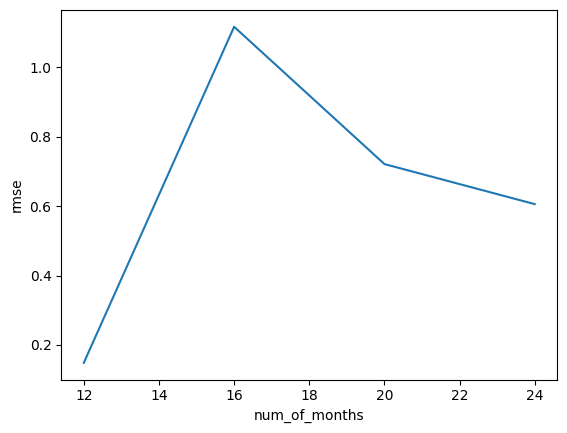

In [ ]:
### creating the train and test sets
train_1 = df[df['Year-Month'] <= batches[0][1]]
test_1 = df[df['Year-Month'] <= batches[0][2]]
test_1 = test_1[test_1['Year-Month'] > batches[0][1]]
X_train_1 = train_1.drop(columns=['Price', 'Year-Month'])
X_test_1 = train_1['Price']
Y_train_1 = test_1.drop(columns=['Price', 'Year-Month'])
Y_test_1 = test_1['Price']

train_2 = df[df['Year-Month'] <= batches[1][1]]
test_2 = df[df['Year-Month'] <= batches[1][2]]
test_2 = test_2[test_2['Year-Month'] > batches[1][1]]
X_train_2 = train_2.drop(columns=['Price', 'Year-Month'])
X_test_2 = train_2['Price']
Y_train_2 = test_2.drop(columns=['Price', 'Year-Month'])
Y_test_2 = test_2['Price']

train_3 = df[df['Year-Month'] <= batches[2][1]]
test_3 = df[df['Year-Month'] <= batches[2][2]]
test_3 = test_3[test_3['Year-Month'] > batches[2][1]]
X_train_3 = train_3.drop(columns=['Price', 'Year-Month'])
X_test_3 = train_3['Price']
Y_train_3 = test_3.drop(columns=['Price', 'Year-Month'])
Y_test_3 = test_3['Price']

train_4 = df[df['Year-Month'] <= batches[3][1]]
test_4 = df[df['Year-Month'] <= batches[3][2]]
test_4 = test_4[test_4['Year-Month'] > batches[3][1]]

X_train_4 = train_4.drop(columns=['Price', 'Year-Month'])
X_test_4 = train_4['Price']
Y_train_4 = test_4.drop(columns=['Price', 'Year-Month'])
Y_test_4 = test_4['Price']


### creating models per train-test set
lin_reg_1 = LinearRegression()
lin_reg_2 = LinearRegression()
lin_reg_3 = LinearRegression()
lin_reg_4 = LinearRegression()

lin_reg_1.fit(X_train_1, X_test_1)
lin_reg_2.fit(X_train_2, X_test_2)
lin_reg_3.fit(X_train_3, X_test_3)
lin_reg_4.fit(X_train_4, X_test_4)

###getting predictions
pred_1 = lin_reg_1.predict(Y_train_1)
pred_2 = lin_reg_2.predict(Y_train_2)
pred_3 = lin_reg_3.predict(Y_train_3)
pred_4 = lin_reg_4.predict(Y_train_4)

###calculating error
rmse_1 = mean_squared_error(Y_test_1, pred_1)
rmse_2 = mean_squared_error(Y_test_2, pred_2)
rmse_3 = mean_squared_error(Y_test_3, pred_3)
rmse_4 = mean_squared_error(Y_test_4, pred_4)

error_data = {'rmse': [rmse_1, rmse_2, rmse_3, rmse_4], 'num_of_months': [12, 16, 20, 24]}
error_df = pd.DataFrame(error_data)

sns.lineplot(error_df, x = 'num_of_months', y = 'rmse')




### Perform cross validation for feature selection

c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Cross-Validation RMSE Scores: [1.38032809 1.29027006 1.1019464  0.48507528 1.35868564]
Mean Cross-Validation RMSE: 1.1232610955701194


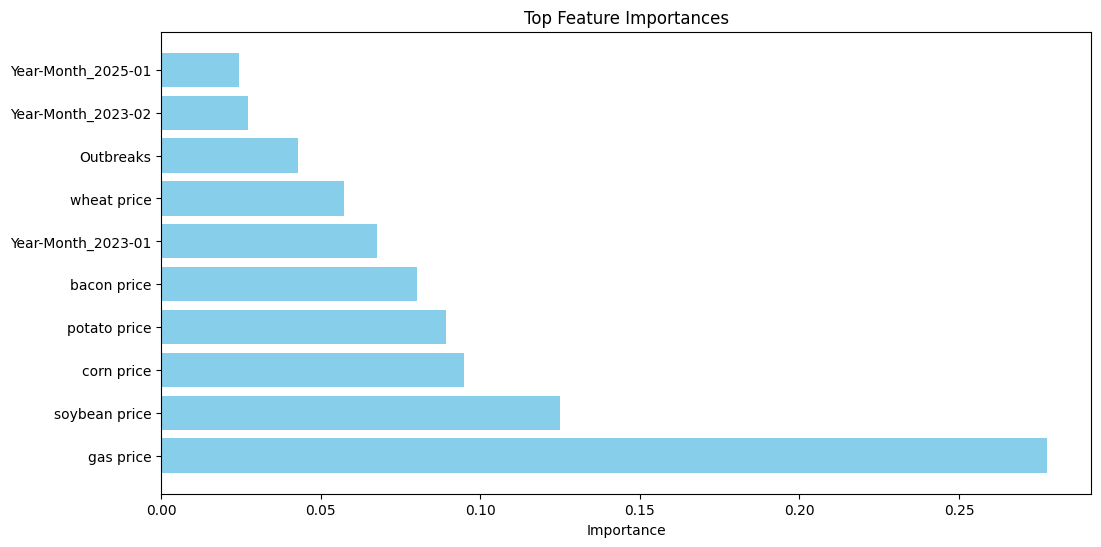

In [ ]:
# Perform cross validation for feature selection
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with scaling and feature selection
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(RandomForestRegressor(random_state=42))),
    ('model', RandomForestRegressor(random_state=42))
])

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_encoded, y, cv=5, scoring='neg_mean_squared_error')
# Convert negative MSE to RMSE
rmse_scores = (-cv_scores) ** 0.5
# Print the RMSE scores for each fold
print("Cross-Validation RMSE Scores:", rmse_scores)
# Print the mean RMSE score
print("Mean Cross-Validation RMSE:", rmse_scores.mean())
# Feature importance from Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_encoded, y)
importances = rf_model.feature_importances_
feature_names = X_encoded.columns
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df.head(10)
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importances_df['Feature'][:10], importances_df['Importance'][:10], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Feature Importances')
plt.show()


#### Retrain the model with only the top 3 and 4 features

In [ ]:
X_top3 = X_encoded[["gas price", "soybean price", "corn price"]]

# Split the data into training and testing sets
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split(X_top3, y, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top3 = LinearRegression()
lr_model_top3.fit(X_train_top3, y_train_top3)
# Train a Random Forest Regressor
rf_model_top3 = RandomForestRegressor(random_state=42)
rf_model_top3.fit(X_train_top3, y_train_top3)
# Evaluate the models
y_lr_top3 = lr_model_top3.predict(X_test_top3)
y_rf_top3 = rf_model_top3.predict(X_test_top3)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top3 = mean_squared_error(y_test_top3, y_lr_top3)
lr_r2_top3 = r2_score(y_test_top3, y_lr_top3)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top3 = mean_squared_error(y_test_top3, y_rf_top3)
rf_r2_top3 = r2_score(y_test_top3, y_rf_top3)
# Print the evaluation metrics for top 3 features
print("Top 3 Features - Linear Regression RMSE:", lr_rmse_top3)
print("Top 3 Features - Linear Regression R^2:", lr_r2_top3)
print("Top 3 Features - Random Forest RMSE:", rf_rmse_top3)
print("Top 3 Features - Random Forest R^2:", rf_r2_top3)

Top 3 Features - Linear Regression RMSE: 0.1774368405986214
Top 3 Features - Linear Regression R^2: 0.6584038408276767
Top 3 Features - Random Forest RMSE: 0.4308535217571442
Top 3 Features - Random Forest R^2: 0.17053353913666913


c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# retrain with top 4 features
X_top4 = X_encoded[["gas price", "soybean price", "corn price", "potato price"]]

# Split the data into training and testing sets
X_train_top4, X_test_top4, y_train_top4, y_test_top4 = train_test_split(X_top3, y, test_size=0.2, random_state=42)
# Train a Linear Regression model
lr_model_top4 = LinearRegression()
lr_model_top4.fit(X_train_top4, y_train_top4)
# Train a Random Forest Regressor
rf_model_top4 = RandomForestRegressor(random_state=42)
rf_model_top4.fit(X_train_top4, y_train_top4)
# Evaluate the models
y_lr_top4 = lr_model_top4.predict(X_test_top4)
y_rf_top4 = rf_model_top4.predict(X_test_top4)
# Calculate RMSE and R^2 for Linear Regression
lr_rmse_top3 = mean_squared_error(y_test_top4, y_lr_top4)
lr_r2_top4 = r2_score(y_test_top4, y_lr_top4)
# Calculate RMSE and R^2 for Random Forest Regressor
rf_rmse_top4 = mean_squared_error(y_test_top4, y_rf_top4)
rf_r2_top4 = r2_score(y_test_top4, y_rf_top4)
# Print the evaluation metrics for top 3 features
print("Top 4 Features - Linear Regression RMSE:", lr_rmse_top3)
print("Top 4 Features - Linear Regression R^2:", lr_r2_top3)
print("Top 4 Features - Random Forest RMSE:", rf_rmse_top3)
print("Top 4 Features - Random Forest R^2:", rf_r2_top3)

Top 4 Features - Linear Regression RMSE: 0.17743684059862122
Top 4 Features - Linear Regression R^2: 0.6584038408276771
Top 4 Features - Random Forest RMSE: 0.4601169830571443
Top 4 Features - Random Forest R^2: 0.11419638868672122


c:\Users\xenia\Downloads\hello\.conda\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RMSE and R^2 got worse for the random forest model, use top 3 features.

### CART model

In [ ]:
#create a cart model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

In [ ]:
rmse = mean_squared_error(y_test, y_pred_tree)
print("RMSE of Decision Tree Regressor:", rmse)

RMSE of Decision Tree Regressor: 0.4071247142857143


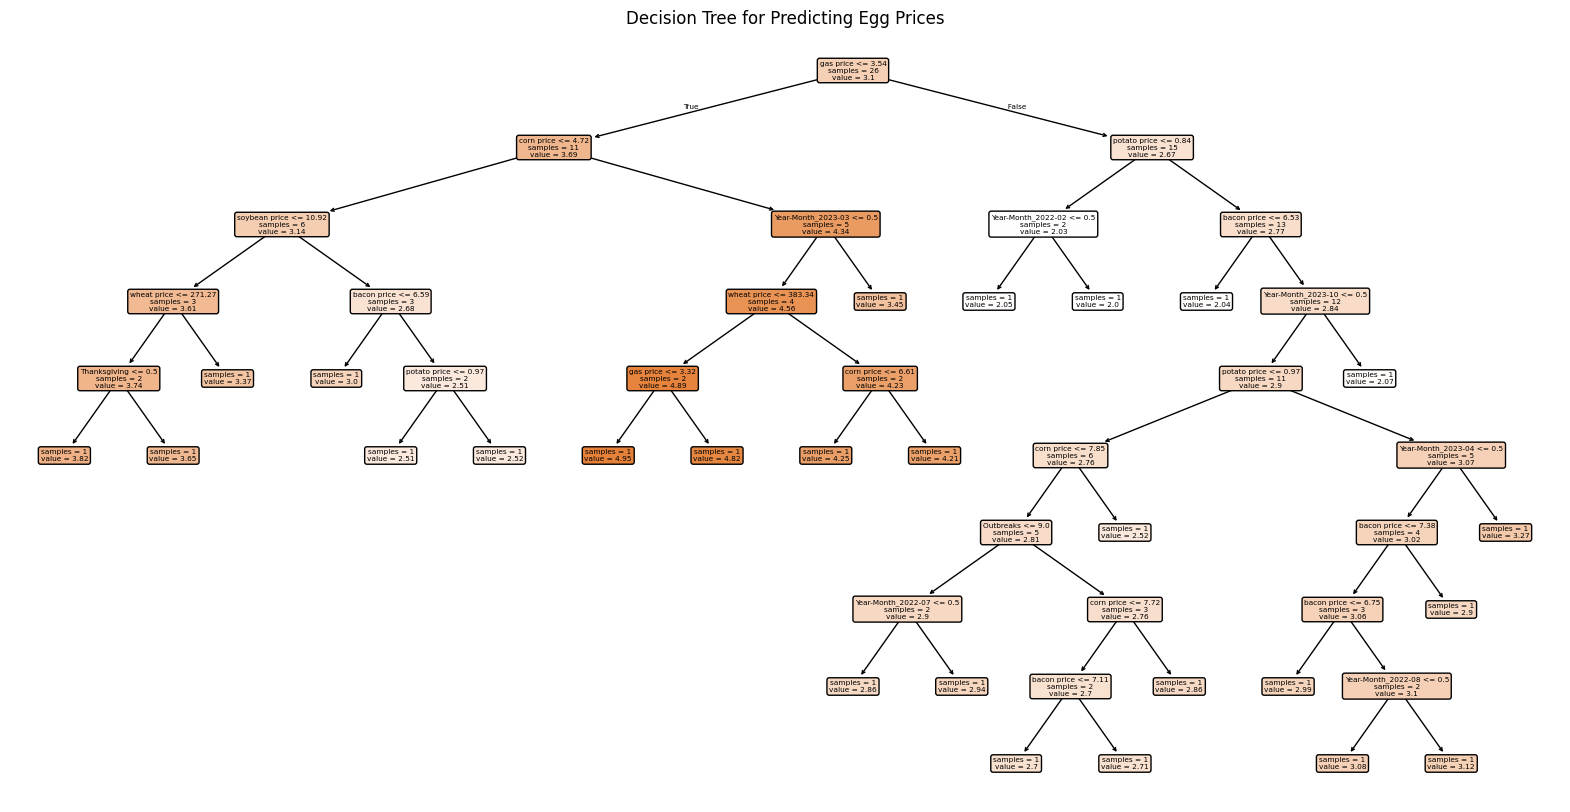

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_encoded.columns, filled=True, rounded = True, impurity = False, proportion = False, precision = 2)
plt.title('Decision Tree for Predicting Egg Prices')    
plt.show()